In [11]:
import pandas as pd # "pandas is a fast, powerful, flexible and easy to use open source data analysis and manipulation tool"
import numpy as np # matte ting + arrays
import matplotlib.pyplot as plt # grafer

# leser inn csv filen med , som desimal ; som verdi seperator og . for blanke verdier
f = pd.read_csv("/Users/askborgen/Desktop/code/python/kpi/tabell.csv", encoding="utf-8-sig", decimal=",", sep=";", na_values=".")
f.head() # øverste 5 rader

,Årstall,Årsgj.snitt2,Jan,Feb,Mar,Apr,Mai,Jun,Jul,Aug,Sep,Okt,Nov,Des
0,2024,NaN,132.0,132.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2023,129.6,126.1,126.6,127.6,129.0,129.6,130.4,130.9,129.9,129.8,131.1,131.8,131.9
2,2022,122.8,117.8,119.1,119.8,121.2,121.5,122.6,124.2,123.9,125.6,126.0,125.8,125.9
3,2021,116.1,114.1,114.9,114.6,115.0,114.9,115.3,116.3,116.3,117.5,117.2,118.1,118.9
4,2020,112.2,111.3,111.2,111.2,111.7,111.9,112.1,112.9,112.5,112.9,113.2,112.4,112.9


[2.9 2.9 2.9 ... nan nan nan]


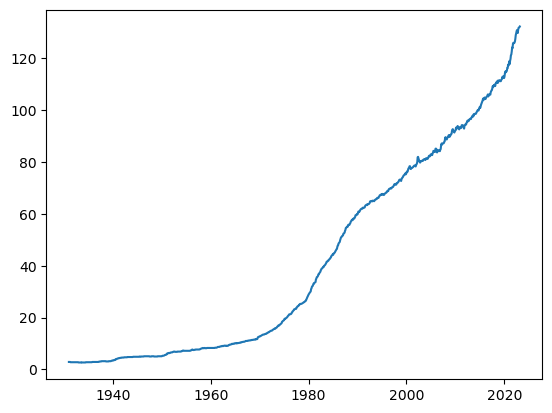

In [12]:
# Alle veridene i en linje så [jan 1931, feb 1931, mar 1931, ..., des 2024]
# [::-1,1:] er en 2 dimensjonal slice som returnerer radene baklengs via ::-1 og ekskluderer første to koloner via 2:
flatvalues = f.to_numpy()[::-1,2:].flatten()
print(flatvalues)
plt.plot(np.linspace(f["Årstall"][93], f["Årstall"][0], flatvalues.size), flatvalues) # ploter

In [13]:
npf = f.to_numpy()[:,2:] # eksluderer første 2 koloner og gjør om til en numpy array
minIndex = np.unravel_index(np.nanargmin(npf), npf.shape) # finner index av minste verdi, np.argmin ville valgt nan så np.nanargmin velger minste verdi som ikke er nan, unravell_index gør indexen feks 123 om til index med to tall for rad og kolonne
maxIndex = np.unravel_index(np.nanargmax(npf), npf.shape) # samme men max

print(f["Årstall"][minIndex[0]], f.columns[minIndex[1]+2], np.nanmin(npf)) # printer år og måned
print(f["Årstall"][maxIndex[0]], f.columns[maxIndex[1]+2], np.nanmax(npf)) # samme

1934 Jan 2.7
2024 Feb 132.3


In [14]:
jan = f["Jan"][1:] # alle verdier i kollonen januar untatt 2024
des = f["Des"][1:] # alle verdier i kollonen desember untatt 2024

dif = des-jan # numpy arrays gjør elementvis subtrksjon i dette tilfelle, dette er på grunn av at de bruker SIMD
index = np.argmax(dif)+1 # finner index til høyeste differance

# printer diferanse rundet av, år, KPI for januar og KPI for desember
print(f"dif: {round(dif[index], 3)}, år: {f.values[:,0][index]}, jan: {jan[index]}, des: {des[index]}")

dif: 8.1, år: 2022.0, jan: 117.8, des: 125.9


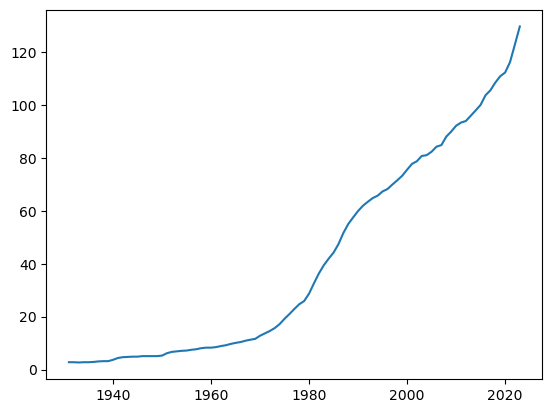

In [15]:
plt.plot(f["Årstall"], f["Årsgj.snitt2"]) # plotter kolonen årstall med kolonen årsgjennomsnitt

<BarContainer object of 12 artists>

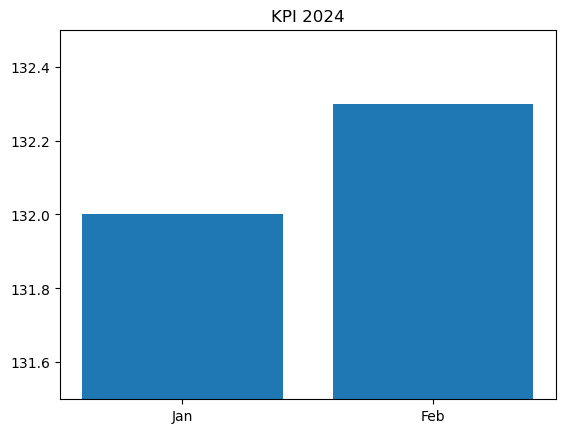

In [16]:
plt.ylim([131.5, 132.5]) # begrenser y aksen
plt.title("KPI 2024") # titel
plt.bar(f.columns[2:], f.to_numpy()[0,2:]) # lager bar graf med navn på koloner og KPI for måndene i 2024


In [17]:
# tar in data fra bruker
fraBeløp = float(input("Beløp: "))
fra = int(input("Fra år: "))
til = int(input("Til år: "))

# finner KPI, np.where vil gi en array med indekser for en kondisjon() f["Årstall"]==fra
fraKPI = f["Årsgj.snitt2"][np.where(f["Årstall"]==fra)[0][0]]
tilKPI = f["Årsgj.snitt2"][np.where(f["Årstall"]==til)[0][0]]

tilBeløp = fraBeløp * tilKPI / fraKPI # regner ut nye beløpet
print(tilBeløp)

54.89403973509934
